# Pandas - Week 8

***

# Random Sampling pada Pandas Data Frame

## Import modules

In [1]:
import pandas as pd

## Persiapan Data Frame

In [2]:
d = {'col_1':[1, 2, 3, 4, 5],
     'col_2':[10, 20, 30, 40, 50]}

df = pd.DataFrame(d)
df

,col_1,col_2
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


## Random sampling with / without replacement

In [3]:
df.sample(n=4, replace=False, random_state=0) # random sampling without replacement.

,col_1,col_2
2,3,30
0,1,10
1,2,20
3,4,40


In [4]:
df.sample(n=4, replace=True, random_state=0) # random sampling with replacement.

,col_1,col_2
4,5,50
0,1,10
3,4,40
3,4,40


Random sampling tanpa replacement berarti data-data yang sudah di sampling tidak akan disampling lagi, sedangkan random sampling dengan replacement berarti data yang sudah disample memiliki kemungkinan untuk di-sampling ulang. 

Untuk menentukan apakah akan dilakukan replacement atau tidak adalah dengan memberikan nilai `True` atau `False` pada parameter `replace`.

`random_state` berfungsi agar suatu eksperimen dapat direplikasi atau dijalankan ulang dengan hasil yang sama.

***

# Akses nilai variable dalam fungsi query

## Import modules

In [5]:
import pandas as pd
import numpy as np

## Persiapan Data Frame

In [7]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), columns = cols)

df

,A,B,C,D,E
0,18,6,5,15,11
1,1,14,16,8,12
2,5,12,13,19,1
3,19,13,6,18,5
4,4,14,17,14,6


## Akses nilai variable pada `query()`

In [8]:
df.query('A > 5')

,A,B,C,D,E
0,18,6,5,15,11
3,19,13,6,18,5


In [9]:
rerata = df['A'].mean() # mencari nilai mean dari kolom A.
rerata

9.4

In [12]:
df.query('A > @rerata') # karakter '@' untuk mengakses variable.

,A,B,C,D,E
0,18,6,5,15,11
3,19,13,6,18,5


Pada kode di atas, dispesifikasikan bahwa akan ditampilkan data dari kolom A yang lebih besar dari variable `rerata`.

***

# Tipe data ordinal pada Pandas Data Frame

Dalam statistik, terdapat data kategori yang terbagi menjadi dua, yaitu tipe data **nominal** dan tipe data **ordinal**. 

Tipe data nominal sifatnya murni sebagai **label**, sedangkan tipe data ordinal memiliki **tingkatan**.

Contoh data ordinal = pilihan seperti buruk, cukup baik, sangat baik.

## Import modules

In [13]:
import pandas as pd

## Persiapan Data Frame

In [14]:
d = {'pelanggan':[11, 12, 13, 14],
     'kepuasan':['baik', 'cukup', 'buruk', 'cukup']}

df = pd.DataFrame(d)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


## Tipe data ordinal pada Pandas

In [15]:
from pandas.api.types import CategoricalDtype # meng-import CategoricalDtype.

tingkat_kepuasan = CategoricalDtype(['buruk', 'cukup', 'baik', 'sangat baik'],
                                   ordered=True)

df['kepuasan'] = df['kepuasan'].astype(tingkat_kepuasan)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


Karena komputer tidak dapat memahami ordinal data type secara langsung, maka perlu diajari terlebih dahulu mengenai cara membandingkannya.

* Langkah pertama adalah dengan menggunakan `CategoricalDtype` yang terdapat di `pandas.api.types`.

* Setelahnya, akan dibuat sebuah data type yang diberi nama `tingkat_kepuasan` dan dilanjutkan dengan menspesifikasikan tingkatannya dengan menggunakan method `CategoricalDtype()`. Pada kode di atas, tingkatannya berupa `buruk`, `cukup`, `baik`, dan `sangat baik`.

* Langkah terakhir adalah dengan mengubah **data type** dari kolom `kepuasan` menjadi `tingkat_kepuasan`.

In [17]:
df = df.sort_values('kepuasan', ascending=True) # mengurutkan data dari kolom kepuasan.
df

,pelanggan,kepuasan
2,13,buruk
1,12,cukup
3,14,cukup
0,11,baik


In [18]:
df[df['kepuasan'] > 'cukup'] # menampilkan nilai dengan tingkat kepuasan lebih dari 'cukup'.

,pelanggan,kepuasan
0,11,baik


***

# Visualisasi Data (plotting) - Pandas Data Frame

## Import modules

In [19]:
import pandas as pd
import numpy as np

## Persiapan Data Frame

In [20]:
n_rows = 40
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), columns = cols)

df.head()

,A,B,C,D,E
0,3,13,10,4,1
1,8,16,19,7,12
2,2,7,13,9,11
3,4,15,11,19,9
4,19,16,5,8,9


## Line Plot

In [21]:
df.head()

,A,B,C,D,E
0,3,13,10,4,1
1,8,16,19,7,12
2,2,7,13,9,11
3,4,15,11,19,9
4,19,16,5,8,9


<AxesSubplot:>

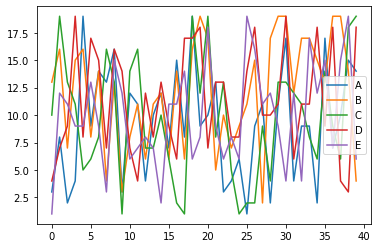

In [22]:
df.plot(kind='line') # melakukan plotting dengan tipe 'line'.

Plotting dilakukand engan menggunakan method `plot()` dan dilanjutkan dengan menspesifikasikan parameter `kind`.

Sumbu x merepresentasikan index, dan sumbu y merepresentasikan nilai yang ditampung setiap cell-nya.

<AxesSubplot:>

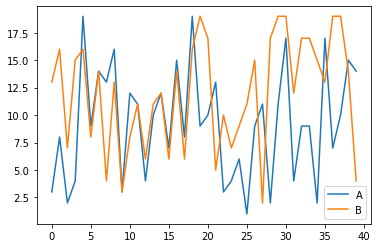

In [23]:
df[['A', 'B']].plot(kind='line') # plotting kolom tertentu saja.

## Bar Plot

In [24]:
df.head()

,A,B,C,D,E
0,3,13,10,4,1
1,8,16,19,7,12
2,2,7,13,9,11
3,4,15,11,19,9
4,19,16,5,8,9


<AxesSubplot:>

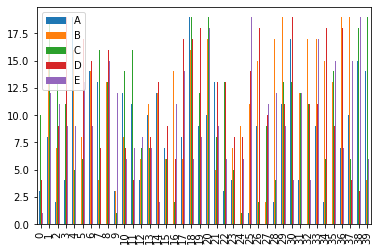

In [25]:
df.plot(kind='bar')

<AxesSubplot:>

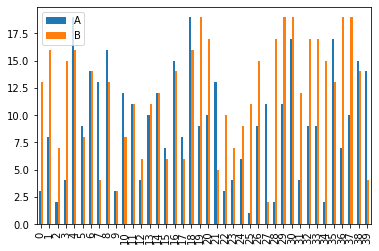

In [26]:
df[['A', 'B']].plot(kind='bar') # plotting kolom A dan B.

<AxesSubplot:>

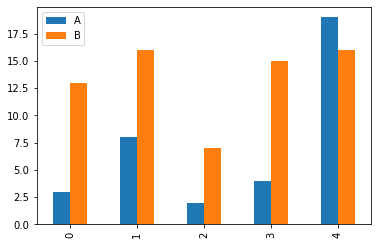

In [27]:
df[['A', 'B']].head().plot(kind='bar') # plotting data lima baris pertama dari kolom A dan B.

<AxesSubplot:>

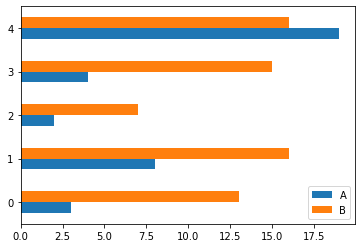

In [28]:
df[['A', 'B']].head().plot(kind='barh') # bar plot horizontal.

## Area Plot

In [29]:
df.head()

,A,B,C,D,E
0,3,13,10,4,1
1,8,16,19,7,12
2,2,7,13,9,11
3,4,15,11,19,9
4,19,16,5,8,9


<AxesSubplot:>

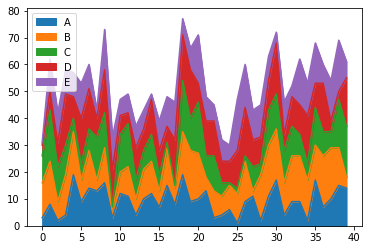

In [30]:
df.plot(kind='area')

Area Plot mirip dengan Line Plot, namun nilainya ditumpuk sehingga diperoleh nilai kumulatif.

<AxesSubplot:>

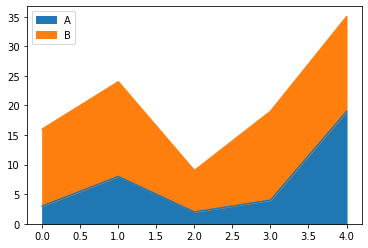

In [31]:
df[['A', 'B']].head().plot(kind='area')

## Box Plot

In [32]:
df.head()

,A,B,C,D,E
0,3,13,10,4,1
1,8,16,19,7,12
2,2,7,13,9,11
3,4,15,11,19,9
4,19,16,5,8,9


<AxesSubplot:>

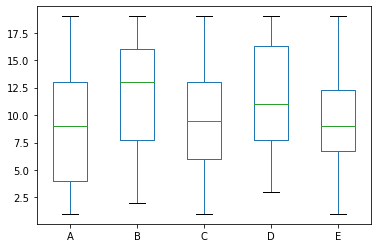

In [33]:
df.plot(kind='box')

Pada Box Plot, sumbu X merepresentasikan kolom.

## Histogram

In [34]:
df.head()

,A,B,C,D,E
0,3,13,10,4,1
1,8,16,19,7,12
2,2,7,13,9,11
3,4,15,11,19,9
4,19,16,5,8,9


<AxesSubplot:ylabel='Frequency'>

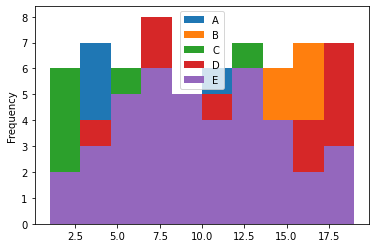

In [35]:
df.plot(kind='hist')

Sumbu Y merepresentasikan frequency, dan sumbu X merepresentasikan nilai yang tertampung pada data frame.

<AxesSubplot:ylabel='Frequency'>

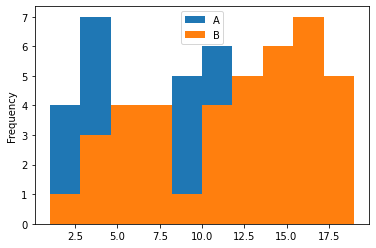

In [36]:
df[['A', 'B']].plot(kind='hist') # fokus ke kolom A dan B saja.

## Kernel Density Estimation (KDE)

In [37]:
df.head()

,A,B,C,D,E
0,3,13,10,4,1
1,8,16,19,7,12
2,2,7,13,9,11
3,4,15,11,19,9
4,19,16,5,8,9


<AxesSubplot:ylabel='Density'>

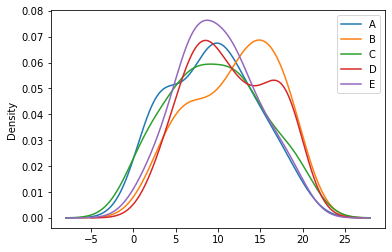

In [38]:
df.plot(kind='kde')

## Scatter Plot

In [39]:
df.head()

,A,B,C,D,E
0,3,13,10,4,1
1,8,16,19,7,12
2,2,7,13,9,11
3,4,15,11,19,9
4,19,16,5,8,9


Scatter Plot merupakan visualisasi yang cocok untuk melihat korelasi antara dua variable atau kolom dalam suatu data frame.

<AxesSubplot:xlabel='A', ylabel='B'>

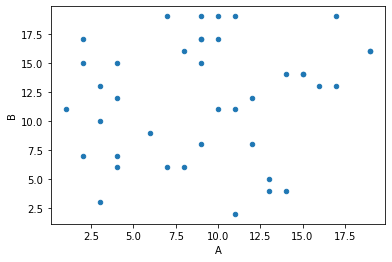

In [41]:
df.plot(x='A', y='B', kind = 'scatter') # x dan y harus dispesifikasikan dengan kolom mana yang ingin dibandingkan.